# Data Analysis notebook only for train.parquet  (the training set) 

### Plan:
- 1) A first look at our dataset with ydata-profile
- 2) Real Data Analysis part

-----------------------------------------------------------------------------------------------

We begin by importing the necessary packages

In [60]:
import numpy as np
import pandas as pd
import ydata_profiling
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


-----------------------------------------------------------------------------------------------
#### 1) A first look at our dataset with ydata-profile

In [61]:
#Load the given train.parquet dataset
data_train = pd.read_parquet("data/train.parquet")

The below report sums up key elements we need to know avec train.parquet

In [62]:
data_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- >b) Real Data Analysis part

In [63]:
data_train.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[ns]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

Do some variables have repetition ? How about the uniqueness ?

In [65]:
data_train.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

We see that we have 30 sites where sometimes multiple counters are installed per site. Our data is taken from 2020-09-01 01:00:00 to 2020-09-09 23:00:00

Let's visualize where our counters are on the Paris Map :

In [66]:

m = folium.Map(location=data_train[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for _, row in (
    data_train[["counter_name", "latitude", "longitude"]]
    .drop_duplicates("counter_name")
    .iterrows()
):
    folium.Marker(
        row[["latitude", "longitude"]].values.tolist(), popup=row["counter_name"]
    ).add_to(m)

m

Let's now display the most frequented sites :

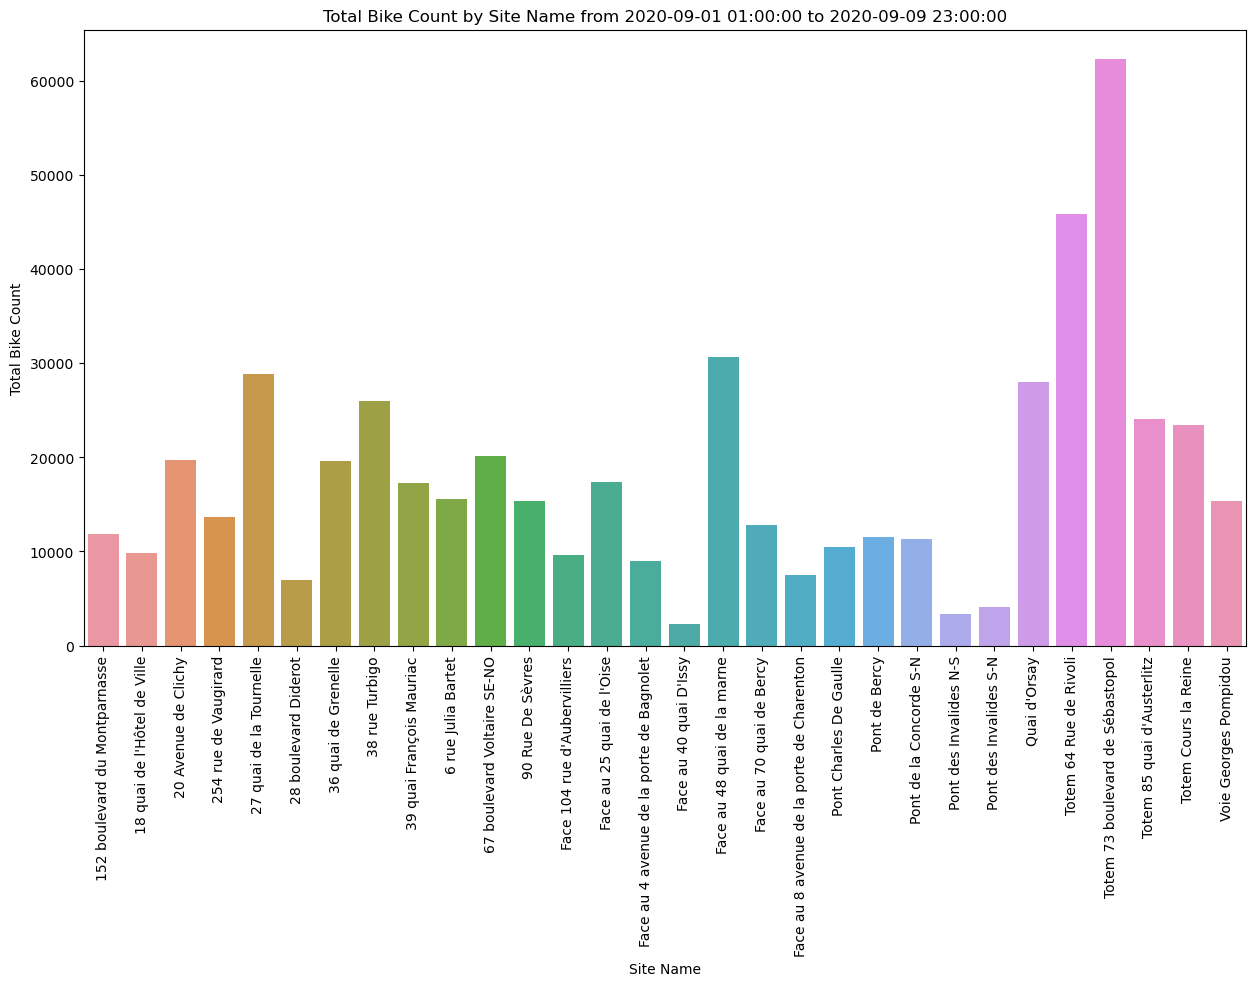

In [67]:
# Group the data by site_name and counter_name and sum the bike_count
grouped_data_train = data_train.groupby(["site_name", "counter_name"])["bike_count"].sum().reset_index()

# Sort the data by bike_count in descending order
grouped_data_sorted = grouped_data_train.sort_values(by="bike_count", ascending=False)

# Create the plot
plt.figure(figsize=(15, 8))  # Adjust the size as needed
sns.barplot(x='site_name', y='bike_count', data=grouped_data_sorted,errorbar=None)

# Improve readability
plt.xticks(rotation=90)  # Rotate site names for better readability
plt.xlabel('Site Name')  # X-axis title
plt.ylabel('Total Bike Count')  # Y-axis title
plt.title('Total Bike Count by Site Name from 2020-09-01 01:00:00 to 2020-09-09 23:00:00')  # Plot title

# Display the plot
plt.show()


We see that "Totem 73 boulevard de Sébastopol" is the most frequented site. Let's see how the distribution of bike_count for this site. Is it linear ? Does it have peaks ? How many counters are there in this site ? 

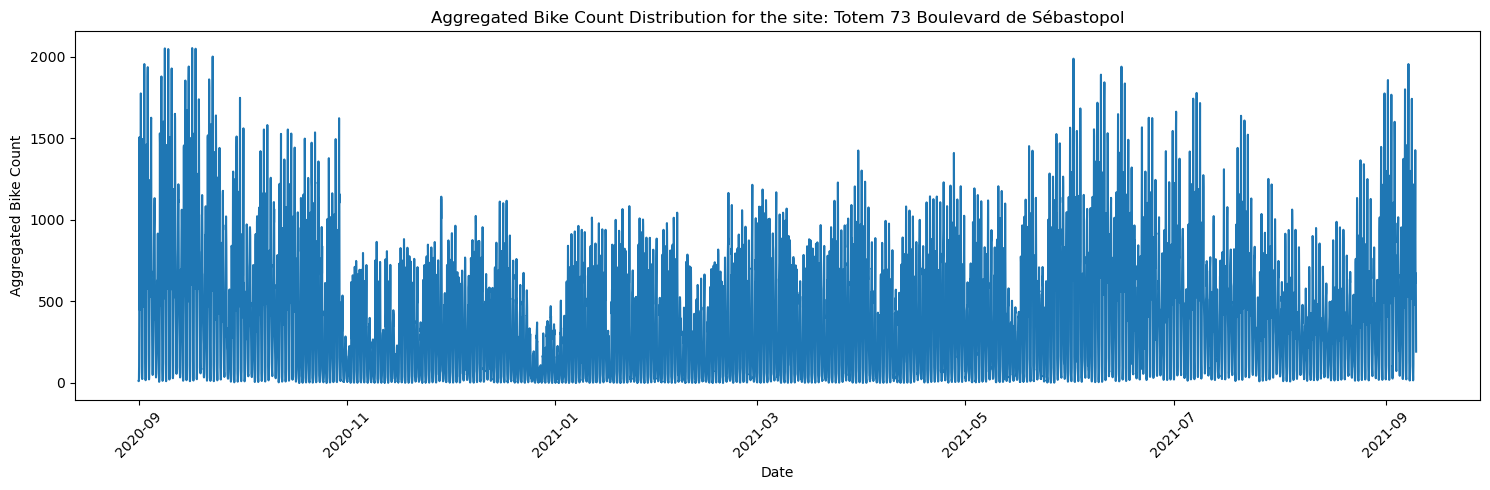

The number of counters at the Totem 73 boulevard de Sébastopol site: 2


In [68]:
# Filtering data for the "Totem 73 boulevard de Sébastopol" site
totem_data = data_train[data_train['site_name'] == "Totem 73 boulevard de Sébastopol"]

# Aggregate bike counts by date
daily_counts = totem_data.groupby('date')['bike_count'].sum().reset_index()

# Plot the aggregated bike_count over time
plt.figure(figsize=(15, 5))
plt.plot(daily_counts['date'], daily_counts['bike_count'], linestyle='-')
plt.title('Aggregated Bike Count Distribution for the site: Totem 73 Boulevard de Sébastopol')
plt.xlabel('Date')
plt.ylabel('Aggregated Bike Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Count the number of unique counters at the "Totem 73 boulevard de Sébastopol" site
print(f"The number of counters at the Totem 73 boulevard de Sébastopol site: {totem_data['counter_name'].nunique()}")


Let's see which of the two counters in this Site are the most popular

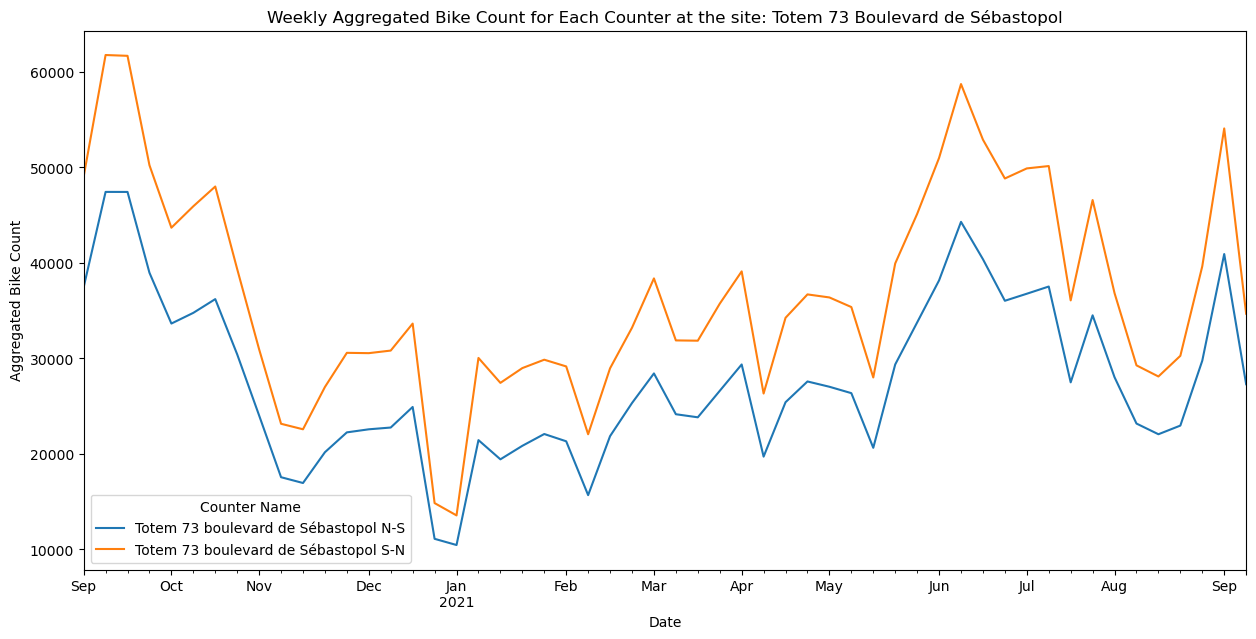

In [69]:
# Create a figure and axis for the plot
plt.figure(figsize=(15, 7))

# Get the list of all unique counters at the "Totem 73 boulevard de Sébastopol" site
unique_counters = totem_data['counter_name'].unique()

# Plot the weekly aggregated bike_count for each counter
for counter in unique_counters:
    # Apply mask for the current counter
    mask = totem_data["counter_name"] == counter
    counter_data = totem_data[mask]

    # Group data by week and sum bike counts
    weekly_counts = counter_data.groupby(pd.Grouper(freq="1w", key="date"))["bike_count"].sum()

    # Plot the data with the counter name as the label
    weekly_counts.plot(label=counter)

# Finalize the plot
plt.title('Weekly Aggregated Bike Count for Each Counter at the site: Totem 73 Boulevard de Sébastopol')
plt.xlabel('Date')
plt.ylabel('Aggregated Bike Count')
plt.legend(title='Counter Name')
plt.show()


Let's now focus on the weekly behaviour of the counters composing 4 Sites we choosed randomly

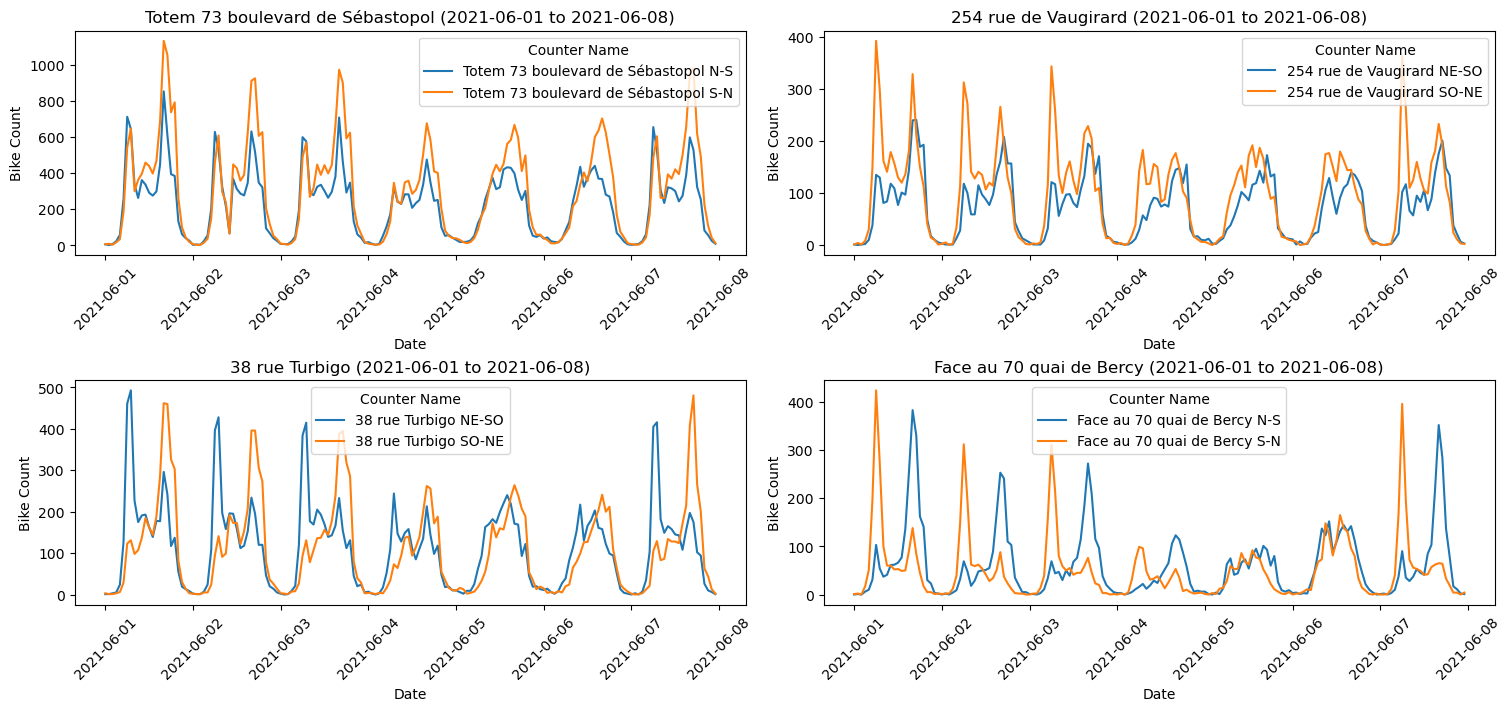

In [70]:
# Define the sites of interest
sites_of_interest = ['Totem 73 boulevard de Sébastopol', '254 rue de Vaugirard', '38 rue Turbigo', 'Face au 70 quai de Bercy']

# Define the time period of interest
start_date = pd.to_datetime("2021-06-01")
end_date = pd.to_datetime("2021-06-08")

# Create a 2x2 subplot structure for the four sites
fig, axs = plt.subplots(2, 2, figsize=(15, 7), constrained_layout=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot the daily bike_count for each counter during the specified week for each site
for idx, site_name in enumerate(sites_of_interest):
    # Filter the data for the given site and week
    site_week_data = data_train[(data_train['site_name'] == site_name) & 
                                (data_train['date'] >= start_date) & 
                                (data_train['date'] < end_date)]

    # Get the list of all unique counters at the current site
    unique_counters = site_week_data['counter_name'].unique()

    # Plot the daily bike_count for each counter
    for counter in unique_counters:
        # Apply mask for the current counter
        mask = site_week_data["counter_name"] == counter
        counter_data = site_week_data[mask]

        # Group data by date and sum bike counts
        daily_counts = counter_data.groupby('date')['bike_count'].sum().reset_index()

        # Plot the data with the counter name as the label on the appropriate subplot
        axs[idx].plot(daily_counts['date'], daily_counts['bike_count'], label=counter)

    # Finalize each subplot
    axs[idx].set_title(f'{site_name} (2021-06-01 to 2021-06-08)')
    axs[idx].set_xlabel('Date')
    axs[idx].set_ylabel('Bike Count')
    axs[idx].legend(title='Counter Name')
    axs[idx].tick_params(axis='x', rotation=45)

# Adjust the layout so that all subplots fit into the figure neatly
plt.show()

Why should we use the target variable as log(count_bike) instead of count_bike ?

Because we see that the hourly pattern has a clear variation between work days and weekends. If we look at the distribution of the target variable it skewed and non normal.

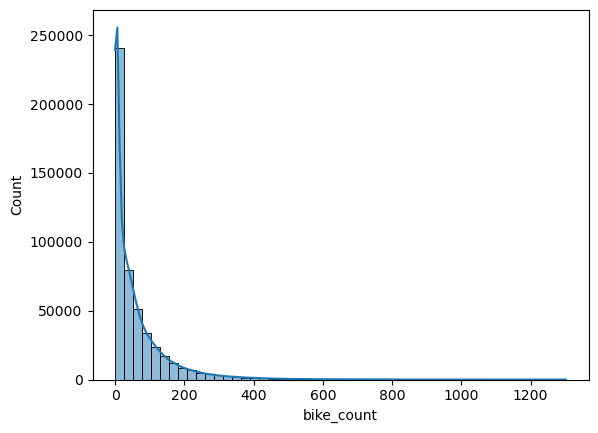

In [71]:
ax = sns.histplot(data_train, x="bike_count", kde=True, bins=50)

The histogram indicates that the bike_count data is highly skewed to the right, with a large number of counts close to zero and few counts reaching higher values. The KDE line, which is the smooth curve on the histogram, confirms this skewness by showing the peak near the lower end of the bike_count range and a long tail stretching towards the higher counts.

We deduce that: Least square loss would not be appropriate to model it since it is designed for normal error distributions. One way to precede would be to transform the variable with a logarithmic transformation,
```py
data['log_bike_count'] = np.log(1 + data['bike_count'])
```

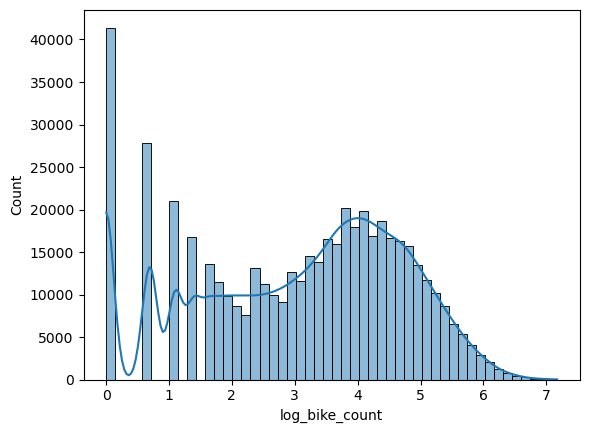

In [72]:
ax = sns.histplot(data_train, x="log_bike_count", kde=True, bins=50)

Conclusion: it has a more pronounced central mode, but is still non symmetric. In the following, **we use `log_bike_count` as the target variable** as otherwise `bike_count` ranges over 3 orders of magnitude and least square loss would be dominated by the few large values. 